# Capstone Project - The Battle of Neighborhoods

### In this final project, I'm going to analyze the data from Fourquare about Helsinki and to cluter them using K-means

In [146]:
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

## Using BeautifulSoup library to get the neighborhoods

In [210]:
from bs4 import BeautifulSoup
import requests
import re
url = "https://www.google.com/search?rlz=1C1GCEA_enFI857FI857&sxsrf=ACYBGNS5Tken3QbDkNVCeasq-lI4_8l1Ww%3A1571308675405&ei=g0SoXaCqGM3KgwfXjIuQAg&q=helsinki+neighborhoods&oq=helsinki+nei&gs_l=psy-ab.3.1.35i39j0l4j38l5.4722.6176..8077...2.3..0.110.480.3j2......0....1..gws-wiz.......0i71j33i160.SXjANwvNzbg"
response = requests.get(url)
helsinki_data = BeautifulSoup(response.text, 'lxml')
contents=helsinki_data.find_all('div', class_='RWuggc kCrYT')
columns = ['Neighborhood']
helsinki_neighborhood = pd.DataFrame(columns = columns)
for content in contents:
    #coordinate = content.find('div', class_='BNeawe s3v9rd AP7Wnd')
    neighbor_ = content.find('div').find('div').text
    helsinki_neighborhood = helsinki_neighborhood.append({'Neighborhood': neighbor_}, ignore_index=True)
helsinki_neighborhood

,Neighborhood
0,Kamppi
1,Suomenlinna
2,Munkkiniemi
3,Herttoniemi
4,Vuosaari
5,Itäkeskus
6,Hernesaari
7,Ullanlinna
8,Kallio
9,Vallila


Use geolocator to get the data for each neighborhood

In [211]:
helsinki_coor = pd.DataFrame(columns = ['Latitude','Longitude'])
geolocator = Nominatim(user_agent="Helsinki")
for row in helsinki_neighborhood['Neighborhood']:
    location = geolocator.geocode(row)
    helsinki_coor = helsinki_coor.append({'Latitude':location.latitude, 'Longitude':location.longitude}, ignore_index=True)
helsinki_neighborhood = helsinki_neighborhood.join(helsinki_coor)
helsinki_neighborhood

,Neighborhood,Latitude,Longitude
0,Kamppi,60.168535,24.930494
1,Suomenlinna,60.145706,24.988860
2,Munkkiniemi,60.199094,24.874358
3,Herttoniemi,60.195525,25.029063
4,Vuosaari,60.208348,25.143554
5,Itäkeskus,60.208652,25.084760
6,Hernesaari,60.148235,25.096343
7,Ullanlinna,60.158715,24.949404
8,Kallio,60.183982,24.952451
9,Vallila,60.196167,24.956710


Let's draw a map of Helsinki

In [212]:
address = 'Helsinki'

geolocator = Nominatim(user_agent="Helsinki")
location = geolocator.geocode(address)
latitude_helsinki = location.latitude
longitude_helsinki = location.longitude
map_helsinki = folium.Map(location=[latitude_helsinki, longitude_helsinki], zoom_start=12)

# add markers to map
for lat, lng, postal in zip(helsinki_neighborhood['Latitude'],helsinki_neighborhood['Longitude'],helsinki_neighborhood['Neighborhood']):
    label = str(postal)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [float(lat), float(lng)],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_helsinki)  
    
map_helsinki

Get the venues using Fourspare

In [213]:
CLIENT_ID = '...'
CLIENT_SECRET = '...'
VERSION = '..' # Foursquare API version
radius=1000
LIMIT=100
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        print(results)
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)
helsinki_venues = getNearbyVenues(names=helsinki_neighborhood['Neighborhood'],
                                   latitudes=helsinki_neighborhood['Latitude'],
                                   longitudes=helsinki_neighborhood['Longitude']
                                  )


[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5555afa9498efb7ce749253c', 'name': 'Cafe Rouge', 'location': {'address': 'Urho Kekkosen katu 4-6', 'lat': 60.168711384314, 'lng': 24.933027448350565, 'labeledLatLngs': [{'label': 'display', 'lat': 60.168711384314, 'lng': 24.933027448350565}], 'distance': 141, 'postalCode': '00100', 'cc': 'FI', 'neighborhood': 'Kamppi', 'city': 'Helsinki', 'country': 'Suomi', 'formattedAddress': ['Urho Kekkosen katu 4-6', '00100 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d115941735', 'name': 'Middle Eastern Restaurant', 'pluralName': 'Middle Eastern Restaurants', 'shortName': 'Middle Eastern', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/middleeastern_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-5555afa9498efb7ce749253c-0'}, {'reasons': {'count': 0, 'items': [{'summa

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4adcdb23f964a5209d6021e3', 'name': 'Suomenlinna / Sveaborg (Suomenlinna)', 'location': {'lat': 60.14639714311618, 'lng': 24.988703727722168, 'labeledLatLngs': [{'label': 'display', 'lat': 60.14639714311618, 'lng': 24.988703727722168}], 'distance': 77, 'postalCode': '00190', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Southern Finland', 'country': 'Suomi', 'formattedAddress': ['Suomenlinna', '00190 Helsinki', 'Suomi']}, 'categories': [{'id': '50aaa4314b90af0d42d5de10', 'name': 'Island', 'pluralName': 'Islands', 'shortName': 'Island', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/neighborhood_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4adcdb23f964a5209d6021e3-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reas

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '58959f9b04aa4f585df8a2df', 'name': 'Cafe Tarina', 'location': {'address': 'Laajalahdentie 20', 'lat': 60.19848511258456, 'lng': 24.87615037611885, 'labeledLatLngs': [{'label': 'display', 'lat': 60.19848511258456, 'lng': 24.87615037611885}], 'distance': 120, 'postalCode': '00330', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Laajalahdentie 20', '00330 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-58959f9b04aa4f585df8a2df-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInter

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b98df68f964a520805335e3', 'name': 'K-Supermarket Hertta', 'location': {'address': 'Hiihtäjäntie 2', 'lat': 60.19434376475261, 'lng': 25.02923123538494, 'labeledLatLngs': [{'label': 'display', 'lat': 60.19434376475261, 'lng': 25.02923123538494}], 'distance': 131, 'postalCode': '00810', 'cc': 'FI', 'neighborhood': 'Länsi-Herttoniemi', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Hiihtäjäntie 2', '00810 Helsinki', 'Suomi']}, 'categories': [{'id': '52f2ab2ebcbc57f1066b8b46', 'name': 'Supermarket', 'pluralName': 'Supermarkets', 'shortName': 'Supermarket', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4b98df68f964a520805335e3-0'}, {'reasons': {'count': 0, 'items': [{'summary':

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4e3415e362e1733d7aa8a907', 'name': 'UH & FIX Vuosaari', 'location': {'address': 'Vuosaarentie 5', 'crossStreet': 'Vuosaarentie 5', 'lat': 60.20881345039285, 'lng': 25.14148708610372, 'labeledLatLngs': [{'label': 'display', 'lat': 60.20881345039285, 'lng': 25.14148708610372}], 'distance': 125, 'postalCode': '00980', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Vuosaarentie 5 (Vuosaarentie 5)', '00980 Helsinki', 'Suomi']}, 'categories': [{'id': '52e81612bcbc57f1066b7a26', 'name': 'Recreation Center', 'pluralName': 'Recreation Centers', 'shortName': 'Recreation Center', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/sports_outdoors_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4e3415e362e1733d7aa8a907-0'}, {'reasons': {'c

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5bfec9d43e6741002c8bfd96', 'name': 'Finnkino Itis', 'location': {'address': 'Kauppakeskus Itis', 'crossStreet': 'Itäkatu 1-7', 'lat': 60.21161457404127, 'lng': 25.083385680693585, 'labeledLatLngs': [{'label': 'display', 'lat': 60.21161457404127, 'lng': 25.083385680693585}], 'distance': 338, 'postalCode': '00930', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Kauppakeskus Itis (Itäkatu 1-7)', '00930 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d180941735', 'name': 'Multiplex', 'pluralName': 'Multiplexes', 'shortName': 'Cineplex', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/movietheater_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-5bfec9d43e6741002c8bfd96-0'}, {'reasons': {'count': 0, 'items

[]
[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4bf7a40b8d30d13a1658ff17', 'name': 'Paulette', 'location': {'address': 'Kapteeninkatu 24', 'lat': 60.15847474060906, 'lng': 24.94611096237136, 'labeledLatLngs': [{'label': 'display', 'lat': 60.15847474060906, 'lng': 24.94611096237136}], 'distance': 184, 'postalCode': '00150', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Kapteeninkatu 24', '00150 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d10c941735', 'name': 'French Restaurant', 'pluralName': 'French Restaurants', 'shortName': 'French', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/french_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4bf7a40b8d30d13a1658ff17-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general'

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '55c05553498e34f444525898', 'name': 'IPI Kulmakuppila', 'location': {'address': 'Porthaninkatu 13', 'lat': 60.1832004705776, 'lng': 24.9535246402516, 'labeledLatLngs': [{'label': 'display', 'lat': 60.1832004705776, 'lng': 24.9535246402516}], 'distance': 105, 'postalCode': '00530', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Porthaninkatu 13', '00530 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-55c05553498e34f444525898-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalIntera

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '573d8b67cd10fe71e4cd59fd', 'name': 'Bites Burgers', 'location': {'address': 'Nokiantie 2-4', 'lat': 60.19577981722673, 'lng': 24.951039478182793, 'labeledLatLngs': [{'label': 'display', 'lat': 60.19577981722673, 'lng': 24.951039478182793}], 'distance': 316, 'postalCode': '00510', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Nokiantie 2-4', '00510 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d16c941735', 'name': 'Burger Joint', 'pluralName': 'Burger Joints', 'shortName': 'Burgers', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/burger_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-573d8b67cd10fe71e4cd59fd-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonNa

[]
[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5b002214e1f228002c5fc41e', 'name': 'Harbour Tap & Taste', 'location': {'address': 'Capellanaukio 1', 'lat': 60.183912060225516, 'lng': 24.982927866606275, 'labeledLatLngs': [{'label': 'display', 'lat': 60.183912060225516, 'lng': 24.982927866606275}], 'distance': 216, 'postalCode': '00540', 'cc': 'FI', 'neighborhood': 'Sömäinen', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Capellanaukio 1', '00540 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d155941735', 'name': 'Gastropub', 'pluralName': 'Gastropubs', 'shortName': 'Gastropub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/gastropub_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-5b002214e1f228002c5fc41e-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4bdc65942a3a0f474ba3b2b6', 'name': 'Mount Everest Nokka', 'location': {'address': 'Luotsikatu 12 A', 'lat': 60.167872, 'lng': 24.966604, 'labeledLatLngs': [{'label': 'display', 'lat': 60.167872, 'lng': 24.966604}], 'distance': 131, 'postalCode': '00160', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Luotsikatu 12 A', '00160 Helsinki', 'Suomi']}, 'categories': [{'id': '52e81612bcbc57f1066b79fb', 'name': 'Himalayan Restaurant', 'pluralName': 'Himalayan Restaurants', 'shortName': 'Himalayan', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4bdc65942a3a0f474ba3b2b6-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4e92b4398b81592e625bf454', 'name': 'Ravintola Makalu', 'location': {'address': 'Pikkalankatu 5', 'lat': 60.25029104021363, 'lng': 25.01294620335102, 'labeledLatLngs': [{'label': 'display', 'lat': 60.25029104021363, 'lng': 25.01294620335102}], 'distance': 247, 'postalCode': '00700', 'cc': 'FI', 'neighborhood': 'Ala-Malmi', 'city': 'Helsinki', 'country': 'Suomi', 'formattedAddress': ['Pikkalankatu 5', '00700 Helsinki', 'Suomi']}, 'categories': [{'id': '52e81612bcbc57f1066b79fb', 'name': 'Himalayan Restaurant', 'pluralName': 'Himalayan Restaurants', 'shortName': 'Himalayan', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4e92b4398b81592e625bf454-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5764117738faa6615e994590', 'name': 'Ravintola Nuur', 'location': {'address': 'Ostostie 4', 'lat': 60.238306, 'lng': 25.083837, 'labeledLatLngs': [{'label': 'display', 'lat': 60.238306, 'lng': 25.083837}], 'distance': 215, 'postalCode': '00940', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Ostostie 4', '00940 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d115941735', 'name': 'Middle Eastern Restaurant', 'pluralName': 'Middle Eastern Restaurants', 'shortName': 'Middle Eastern', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/middleeastern_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-5764117738faa6615e994590-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonN

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b95fdecf964a52086b934e3', 'name': 'Pitkäkosken maja', 'location': {'address': 'Kuninkaantammentie', 'lat': 60.26603317404943, 'lng': 24.898176505582164, 'labeledLatLngs': [{'label': 'display', 'lat': 60.26603317404943, 'lng': 24.898176505582164}], 'distance': 294, 'postalCode': '00430', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Kuninkaantammentie', '00430 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4b95fdecf964a52086b934e3-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'gl

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '58ceaa82f7f8dd690c2fe199', 'name': 'Capperi', 'location': {'address': 'Siltavoudintie 9', 'lat': 60.23119024356914, 'lng': 24.968003141088932, 'labeledLatLngs': [{'label': 'display', 'lat': 60.23119024356914, 'lng': 24.968003141088932}], 'distance': 312, 'postalCode': '00640', 'cc': 'FI', 'neighborhood': 'Oulunkylä', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Siltavoudintie 9', '00640 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-58ceaa82f7f8dd690c2fe199-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'typ

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4cb80b2190c9a143a4637cd6', 'name': 'Golden Pizza Kebab', 'location': {'address': 'Vanhaistentie 3', 'lat': 60.242399387967374, 'lng': 24.885465842351845, 'labeledLatLngs': [{'label': 'display', 'lat': 60.242399387967374, 'lng': 24.885465842351845}], 'distance': 180, 'postalCode': '00420', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Vanhaistentie 3', '00420 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4cb80b2190c9a143a4637cd6-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 're

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4dcd35808877851243d867b7', 'name': 'InterPizza', 'location': {'address': 'Luutnantinaukio 5', 'lat': 60.24798036486236, 'lng': 24.86386127493939, 'labeledLatLngs': [{'label': 'display', 'lat': 60.24798036486236, 'lng': 24.86386127493939}], 'distance': 263, 'postalCode': '00410', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Luutnantinaukio 5', '00410 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4dcd35808877851243d867b7-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4c59a52a04f9be9a49d1ef60', 'name': 'Käpylän Lippakioski', 'location': {'address': 'Kullervonkatu', 'crossStreet': 'Pohjolankatu', 'lat': 60.217122021051885, 'lng': 24.955146106578283, 'labeledLatLngs': [{'label': 'display', 'lat': 60.217122021051885, 'lng': 24.955146106578283}], 'distance': 206, 'postalCode': '00610', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Kullervonkatu (Pohjolankatu)', '00610 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}, 'venuePage': {'id': '59433548'}}, 'referralId': 'e-0-4c59a52a04f9be9a49d1ef60-0'}, {'reas

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5a46722a3b83076b585f0601', 'name': 'Ristorante Bello', 'location': {'address': 'Maakaari 9 A 1', 'lat': 60.229019505043745, 'lng': 25.028472602334062, 'labeledLatLngs': [{'label': 'display', 'lat': 60.229019505043745, 'lng': 25.028472602334062}], 'distance': 488, 'postalCode': '00790', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Maakaari 9 A 1', '00790 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-5a46722a3b83076b585f0601-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4d3066ea236aa143252654eb', 'name': 'Dilber Pizzeria', 'location': {'address': 'Riihipellonkuja 3', 'crossStreet': 'Riihipellontie', 'lat': 60.237922711181135, 'lng': 24.846182974036104, 'labeledLatLngs': [{'label': 'display', 'lat': 60.237922711181135, 'lng': 24.846182974036104}], 'distance': 70, 'postalCode': '00390', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Riihipellonkuja 3 (Riihipellontie)', '00390 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4d3066ea236aa143252654eb-0'}, {'reasons': {'count': 0, 'items': [{'summar

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4fa29b0ce4b07ed2187ce71b', 'name': 'Motivus', 'location': {'address': 'Kauppakeskus Ruoholahti', 'crossStreet': 'Itämerenkatu 21', 'lat': 60.1634310814117, 'lng': 24.911050824673815, 'labeledLatLngs': [{'label': 'display', 'lat': 60.1634310814117, 'lng': 24.911050824673815}], 'distance': 61, 'postalCode': '00180', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Kauppakeskus Ruoholahti (Itämerenkatu 21)', '00180 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d176941735', 'name': 'Gym', 'pluralName': 'Gyms', 'shortName': 'Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4fa29b0ce4b07ed2187ce71b-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5533a6eb498ed9e3d6bb80e4', 'name': 'Roihuvuoren Rio', 'location': {'lat': 60.198363006325664, 'lng': 25.058131326199472, 'labeledLatLngs': [{'label': 'display', 'lat': 60.198363006325664, 'lng': 25.058131326199472}], 'distance': 383, 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-5533a6eb498ed9e3d6bb80e4-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '51ced0df498e9a2d663c119b', 'name': 'Kah

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4de655e01f6e9d90c7f02ffc', 'name': 'Ihana Kahvila', 'location': {'address': 'Nihtikuja', 'lat': 60.177882020098274, 'lng': 24.971864358015118, 'labeledLatLngs': [{'label': 'display', 'lat': 60.177882020098274, 'lng': 24.971864358015118}], 'distance': 338, 'postalCode': '00500', 'cc': 'FI', 'neighborhood': 'Sompasaari', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Nihtikuja', '00500 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4de655e01f6e9d90c7f02ffc-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reaso

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5308a60d498e088bdc45e1ab', 'name': 'Bon Temps Café', 'location': {'address': 'Mannerheimintie 132', 'lat': 60.1934, 'lng': 24.9062, 'labeledLatLngs': [{'label': 'display', 'lat': 60.1934, 'lng': 24.9062}], 'distance': 300, 'postalCode': '00270', 'cc': 'FI', 'neighborhood': 'Meilahti', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Mannerheimintie 132', '00270 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-5308a60d498e088bdc45e1ab-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'rea

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4bf02f0cc601a593f260c3d1', 'name': 'Kumpulanlaakso', 'location': {'address': 'Kumpula', 'lat': 60.20347124594085, 'lng': 24.95767593383789, 'labeledLatLngs': [{'label': 'display', 'lat': 60.20347124594085, 'lng': 24.95767593383789}], 'distance': 63, 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Kumpula', 'Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4bf02f0cc601a593f260c3d1-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4c

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b1970e2f964a52064dd23e3', 'name': 'Alppiruusupuisto', 'location': {'address': 'Laajasuontie 40', 'lat': 60.22202523911977, 'lng': 24.893418593495483, 'labeledLatLngs': [{'label': 'display', 'lat': 60.22202523911977, 'lng': 24.893418593495483}], 'distance': 411, 'postalCode': '00320', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Laajasuontie 40', '00320 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d15a941735', 'name': 'Garden', 'pluralName': 'Gardens', 'shortName': 'Garden', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/garden_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4b1970e2f964a52064dd23e3-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reas

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4bf29b58767076b0c971bf98', 'name': 'Arabian rantapuisto', 'location': {'address': 'Arabianranta', 'lat': 60.21026662341423, 'lng': 24.981686446654166, 'labeledLatLngs': [{'label': 'display', 'lat': 60.21026662341423, 'lng': 24.981686446654166}], 'distance': 234, 'postalCode': '00560', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Arabianranta', '00560 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4bf29b58767076b0c971bf98-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'g

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4cbaf04143ec6dcb2183a731', 'name': 'Eiranranta', 'location': {'address': 'Eiranranta', 'crossStreet': 'Telakkakatu 2', 'lat': 60.15469014199896, 'lng': 24.934630393981934, 'labeledLatLngs': [{'label': 'display', 'lat': 60.15469014199896, 'lng': 24.934630393981934}], 'distance': 266, 'postalCode': '00150', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Eiranranta (Telakkakatu 2)', '00150 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d1e2941735', 'name': 'Beach', 'pluralName': 'Beaches', 'shortName': 'Beach', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/beach_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4cbaf04143ec6dcb2183a731-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popul

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '543b99c3498e5113f8bf4481', 'name': 'Onda', 'location': {'address': 'Siltanen', 'crossStreet': 'Hämeentie 13', 'lat': 60.183989, 'lng': 24.959958, 'labeledLatLngs': [{'label': 'display', 'lat': 60.183989, 'lng': 24.959958}], 'distance': 246, 'postalCode': '00530', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Southern Finland', 'country': 'Suomi', 'formattedAddress': ['Siltanen (Hämeentie 13)', '00530 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d1cd941735', 'name': 'South American Restaurant', 'pluralName': 'South American Restaurants', 'shortName': 'South American', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/argentinian_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}, 'venuePage': {'id': '96938365'}}, 'referralId': 'e-0-543b99c3498e5113f8bf4481-0'}, {'reasons': {'count': 0, '

[]
[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4c52645a250dd13a7e67c47e', 'name': 'Tector Pukinmäki', 'location': {'address': 'Rälssintie 12', 'lat': 60.24161, 'lng': 24.98693, 'labeledLatLngs': [{'label': 'display', 'lat': 60.24161, 'lng': 24.98693}], 'distance': 432, 'postalCode': '00720', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Rälssintie 12', '00720 Helsinki', 'Suomi']}, 'categories': [{'id': '52f2ab2ebcbc57f1066b8b36', 'name': 'IT Services', 'pluralName': 'IT Services', 'shortName': 'IT Services', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/technology_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4c52645a250dd13a7e67c47e-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionRea

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5316eb89498ed5932e88719c', 'name': 'Fitness24Seven Mellunmäki', 'location': {'address': 'Ounasvaarantie 9', 'crossStreet': 'Laakavuorentori', 'lat': 60.239610248047995, 'lng': 25.112136621464618, 'labeledLatLngs': [{'label': 'display', 'lat': 60.239610248047995, 'lng': 25.112136621464618}], 'distance': 267, 'postalCode': '00970', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Ounasvaarantie 9 (Laakavuorentori)', '00970 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d176941735', 'name': 'Gym', 'pluralName': 'Gyms', 'shortName': 'Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-5316eb89498ed5932e88719c-0'}, {'reasons': {'count': 0, 'items': [{'summary': '

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '525958c1498ec17e93d5617c', 'name': 'Fornitaly', 'location': {'address': 'Jollaksentie 54 B', 'lat': 60.16384135694505, 'lng': 25.081258367842285, 'labeledLatLngs': [{'label': 'display', 'lat': 60.16384135694505, 'lng': 25.081258367842285}], 'distance': 404, 'postalCode': '00850', 'cc': 'FI', 'neighborhood': 'Sydöstra', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Jollaksentie 54 B', '00850 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-525958c1498ec17e93d5617c-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', '

[]
[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '53e34b17498e78268d9ba1b3', 'name': 'K-Supermarket', 'location': {'address': 'Jakomäentie 1', 'lat': 60.2619243559356, 'lng': 25.074852898698936, 'labeledLatLngs': [{'label': 'display', 'lat': 60.2619243559356, 'lng': 25.074852898698936}], 'distance': 365, 'postalCode': '00770', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Jakomäentie 1', '00770 Helsinki', 'Suomi']}, 'categories': [{'id': '52f2ab2ebcbc57f1066b8b46', 'name': 'Supermarket', 'pluralName': 'Supermarkets', 'shortName': 'Supermarket', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-53e34b17498e78268d9ba1b3-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general',

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4bdd97ec5b31c9b66a0f9d16', 'name': 'Tapulikaupungin liikuntapuisto', 'location': {'address': 'Parmaajantie 3', 'lat': 60.27342077653439, 'lng': 25.01917327783473, 'labeledLatLngs': [{'label': 'display', 'lat': 60.27342077653439, 'lng': 25.01917327783473}], 'distance': 483, 'postalCode': '00730', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Etelä-Suomi', 'country': 'Suomi', 'formattedAddress': ['Parmaajantie 3', '00730 Helsinki', 'Suomi']}, 'categories': [{'id': '52e81612bcbc57f1066b7a26', 'name': 'Recreation Center', 'pluralName': 'Recreation Centers', 'shortName': 'Recreation Center', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/sports_outdoors_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4bdd97ec5b31c9b66a0f9d16-0'}, {'reasons': {'count': 0, 'items': [{'summary': '

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4c2649e8f1272d7fdf4a86c5', 'name': 'Rastila Camping', 'location': {'address': 'Karavaanikatu 4', 'lat': 60.20714942346332, 'lng': 25.12127789084645, 'labeledLatLngs': [{'label': 'display', 'lat': 60.20714942346332, 'lng': 25.12127789084645}], 'distance': 383, 'postalCode': '00980', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Karavaanikatu 4', '00980 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d1e4941735', 'name': 'Campground', 'pluralName': 'Campgrounds', 'shortName': 'Campground', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/campground_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4c2649e8f1272d7fdf4a86c5-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'ge

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4bbf3d19006dc9b69c36fc3f', 'name': 'Sushi-san', 'location': {'address': 'Munkkivuoren ostoskeskus', 'lat': 60.205788, 'lng': 24.877348, 'labeledLatLngs': [{'label': 'display', 'lat': 60.205788, 'lng': 24.877348}], 'distance': 369, 'postalCode': '00350', 'cc': 'FI', 'neighborhood': 'Munk', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Munkkivuoren ostoskeskus', '00350 Helsinki', 'Suomi']}, 'categories': [{'id': '4bf58dd8d48988d1d2941735', 'name': 'Sushi Restaurant', 'pluralName': 'Sushi Restaurants', 'shortName': 'Sushi', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/sushi_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4bbf3d19006dc9b69c36fc3f-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'genera

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '50c4a130e4b049cab0c8d914', 'name': 'Kulttuurisauna', 'location': {'address': 'Hakaniemenranta 17', 'crossStreet': 'Merihaka', 'lat': 60.17826016495379, 'lng': 24.963230026951276, 'labeledLatLngs': [{'label': 'display', 'lat': 60.17826016495379, 'lng': 24.963230026951276}], 'distance': 101, 'postalCode': '00530', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Hakaniemenranta 17 (Merihaka)', '00530 Helsinki', 'Suomi']}, 'categories': [{'id': '58daa1558bbb0b01f18ec1ae', 'name': 'Sauna / Steam Room', 'pluralName': 'Saunas / Steam Rooms', 'shortName': 'Sauna / Steam Room', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/spa_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-50c4a130e4b049cab0c8d914-0'}, {'reasons': {'count': 0, 'it

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5013f43ee4b010591f6fe1c5', 'name': 'Gurans', 'location': {'address': 'Mannerheimintie 168', 'crossStreet': 'Korppaanmäentie', 'lat': 60.20300543404889, 'lng': 24.89864280841107, 'labeledLatLngs': [{'label': 'display', 'lat': 60.20300543404889, 'lng': 24.89864280841107}], 'distance': 249, 'postalCode': '00300', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Mannerheimintie 168 (Korppaanmäentie)', '00300 Helsinki', 'Suomi']}, 'categories': [{'id': '52e81612bcbc57f1066b79fb', 'name': 'Himalayan Restaurant', 'pluralName': 'Himalayan Restaurants', 'shortName': 'Himalayan', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-5013f43ee4b010591f6fe1c5-0'}, {'reasons': {'count': 0, 

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '584589b3668af751c28c918f', 'name': 'Sori Taproom', 'location': {'address': 'Vuorikatu 16', 'crossStreet': 'Kaisaniemenkatu', 'lat': 60.17196260035701, 'lng': 24.94743537626617, 'labeledLatLngs': [{'label': 'display', 'lat': 60.17196260035701, 'lng': 24.94743537626617}], 'distance': 147, 'postalCode': '00100', 'cc': 'FI', 'neighborhood': 'Kluuvi', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Vuorikatu 16 (Kaisaniemenkatu)', '00100 Helsinki', 'Suomi']}, 'categories': [{'id': '50327c8591d4c4b30a586d5d', 'name': 'Brewery', 'pluralName': 'Breweries', 'shortName': 'Brewery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/brewery_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-584589b3668af751c28c918f-0'}, {'reasons': {'count': 0, 'items': 

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4bd1a9549854d13a7fe7f94d', 'name': 'Siltamäki Frisbeegolf', 'location': {'address': 'Pallomäentie 14', 'lat': 60.27270971878812, 'lng': 24.981442914134195, 'labeledLatLngs': [{'label': 'display', 'lat': 60.27270971878812, 'lng': 24.981442914134195}], 'distance': 466, 'postalCode': '00740', 'cc': 'FI', 'city': 'Helsinki', 'state': 'Uusimaa', 'country': 'Suomi', 'formattedAddress': ['Pallomäentie 14', '00740 Helsinki', 'Suomi']}, 'categories': [{'id': '52e81612bcbc57f1066b79e8', 'name': 'Disc Golf', 'pluralName': 'Disc Golf Courses', 'shortName': 'Disc Golf', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4bd1a9549854d13a7fe7f94d-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular'

Let's check the venues list from all neighborhoods

In [194]:
helsinki_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Kamppi,60.168535,24.930494,Cafe Rouge,60.168711,24.933027,Middle Eastern Restaurant
1,Kamppi,60.168535,24.930494,Kaffecentralen,60.167580,24.932526,Coffee Shop
2,Kamppi,60.168535,24.930494,Baana,60.169973,24.928837,Road
3,Kamppi,60.168535,24.930494,Pobre,60.169500,24.933484,Filipino Restaurant
4,Kamppi,60.168535,24.930494,Tortilla House,60.169136,24.933228,Burrito Place
...,...,...,...,...,...,...,...
1205,Siltamäki,60.274750,24.988819,R-kioski,60.275036,24.989086,Convenience Store
1206,Siltamäki,60.274750,24.988819,Pizzeria Abone,60.274938,24.989770,Pizza Place
1207,Siltamäki,60.274750,24.988819,HSL Kytöpolku 3280,60.272133,24.992211,Bus Stop
1208,Siltamäki,60.274750,24.988819,Siltamäen Rantapuisto,60.277941,24.985399,Waterfront


In [199]:
helsinki_short = helsinki_venues[['Venue Category','Venue']].groupby('Venue Category').nunique().drop(columns=['Venue Category'])

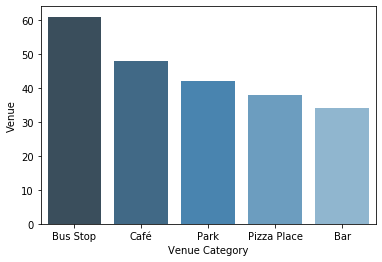

In [200]:
helsinki_short_top = helsinki_short.sort_values(by=['Venue'], ascending=False)[0:5]
#pd.DataFrame(helsinki_short_top)
sns.barplot(x="Venue Category", y="Venue", data=helsinki_short_top.reset_index(), palette="Blues_d")

This plot is a bonus to see the distributions of retaurants in Helsinki

In [201]:
restaurant_short = restaurant_venues[['Venue Category','Venue']].groupby('Venue Category').nunique().drop(columns=['Venue Category'])

[Text(0, 0, 'Scandinavian Restaurant'),
 Text(0, 0, 'Restaurant'),
 Text(0, 0, 'Chinese Restaurant'),
 Text(0, 0, 'Sushi Restaurant'),
 Text(0, 0, 'Italian Restaurant')]

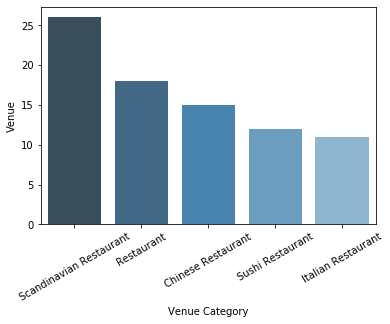

In [202]:

s=sns.barplot(x="Venue Category", y="Venue", data=restaurant_short.sort_values(by=['Venue'], ascending=False)[0:5].reset_index(), palette="Blues_d")
s.set_xticklabels(s.get_xticklabels(), rotation=30)

In [203]:
helsinki_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Kamppi,60.168535,24.930494,Cafe Rouge,60.168711,24.933027,Middle Eastern Restaurant
1,Kamppi,60.168535,24.930494,Kaffecentralen,60.167580,24.932526,Coffee Shop
2,Kamppi,60.168535,24.930494,Baana,60.169973,24.928837,Road
3,Kamppi,60.168535,24.930494,Pobre,60.169500,24.933484,Filipino Restaurant
4,Kamppi,60.168535,24.930494,Tortilla House,60.169136,24.933228,Burrito Place


In [205]:
helsinki_venues_count = helsinki_venues.groupby('Neighborhood').count().reset_index()
helsinki_venues_count[['Neighborhood', 'Venue']]


,Neighborhood,Venue
0,Arabianranta,22
1,Eira,33
2,Haaga,14
3,Herttoniemi,37
4,Itäkeskus,33
5,Jakomäki,19
6,Jollas,4
7,Kaisaniemi,81
8,Kalasatama,33
9,Kallio,87


In [63]:
print('There are {} uniques categories.'.format(len(helsinki_venues['Venue Category'].unique())))

There are 228 uniques categories.


# Analyze Each Neighborhood

In [64]:
helsinki_onehot = pd.get_dummies(helsinki_venues[['Venue Category']], prefix="", prefix_sep="") 

# add neighborhood column back to dataframe
helsinki_onehot['Neighborhood'] = helsinki_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [helsinki_onehot.columns[-1]] + list(helsinki_onehot.columns[:-1])
helsinki_onehot = helsinki_onehot[fixed_columns]

helsinki_onehot.head()

,Neighborhood,ATM,African Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,...,Video Store,Vietnamese Restaurant,Warehouse Store,Waterfront,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,Kamppi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Kamppi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Kamppi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Kamppi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kamppi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
helsinki_onehot.shape

(1210, 229)

In [66]:
# Group rows by neighborhood and take the mean as frequency of occurrence of each cateogry.
helsinki_grouped = helsinki_onehot.groupby('Neighborhood').mean().reset_index()
helsinki_grouped

,Neighborhood,ATM,African Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,...,Video Store,Vietnamese Restaurant,Warehouse Store,Waterfront,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,Arabianranta,0.000000,0.000000,0.000000,0.045455,0.045455,0.045455,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Eira,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.030303,0.030303,0.000000,0.000000,0.000000,0.000000,0.000000
2,Haaga,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Herttoniemi,0.000000,0.000000,0.000000,0.000000,0.000000,0.027027,0.000000,0.000000,0.000000,...,0.027027,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027027,0.000000
4,Itäkeskus,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.030303,0.000000,0.030303,0.000000,0.000000
5,Jakomäki,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Jollas,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Kaisaniemi,0.000000,0.000000,0.000000,0.000000,0.012346,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.024691,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Kalasatama,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030303,0.000000,0.000000,0.000000
9,Kallio,0.000000,0.000000,0.000000,0.011494,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.011494,0.000000,0.000000,0.011494,0.000000,0.000000,0.000000,0.011494,0.000000


Print top 5 most common venues from each neighborhood

In [67]:
num_top_venues = 5

for hood in helsinki_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = helsinki_grouped[helsinki_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arabianranta----
               venue  freq
0          Cafeteria  0.09
1               Park  0.09
2  Recreation Center  0.05
3              Plaza  0.05
4               Café  0.05


----Eira----
                     venue  freq
0  Scandinavian Restaurant  0.09
1                     Park  0.09
2        French Restaurant  0.06
3       Italian Restaurant  0.06
4           Ice Cream Shop  0.06


----Haaga----
               venue  freq
0           Bus Stop  0.36
1  Recreation Center  0.07
2             Bakery  0.07
3          Cafeteria  0.07
4             Garden  0.07


----Herttoniemi----
                  venue  freq
0              Bus Stop  0.19
1  Gym / Fitness Center  0.08
2           Supermarket  0.05
3              Pharmacy  0.05
4        Sandwich Place  0.03


----Itäkeskus----
                  venue  freq
0           Coffee Shop  0.09
1      Sushi Restaurant  0.06
2        Clothing Store  0.06
3         Grocery Store  0.06
4  Gym / Fitness Center  0.06


----Jakomäki----
     

In [68]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Print top 10 venues from each neighborhood

In [160]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = helsinki_grouped['Neighborhood']

for ind in np.arange(helsinki_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(helsinki_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arabianranta,Cafeteria,Park,Restaurant,Café,Plaza,Shopping Mall,Taxi Stand,Grocery Store,Gym,Comic Shop
1,Eira,Scandinavian Restaurant,Park,Bakery,French Restaurant,Café,Italian Restaurant,Boat or Ferry,Playground,Ice Cream Shop,Restaurant
2,Haaga,Bus Stop,Supermarket,Recreation Center,Shoe Repair,Bakery,Cafeteria,Pizza Place,Garden,Indian Restaurant,Sushi Restaurant
3,Herttoniemi,Bus Stop,Gym / Fitness Center,Pharmacy,Supermarket,Playground,Kebab Restaurant,Gastropub,Metro Station,Sandwich Place,Garden
4,Itäkeskus,Coffee Shop,Sushi Restaurant,Clothing Store,Grocery Store,Gym / Fitness Center,Hardware Store,Chinese Restaurant,Outdoor Supply Store,Thai Restaurant,Liquor Store
5,Jakomäki,Bus Stop,Soccer Field,Supermarket,Convenience Store,Shopping Mall,Beach,Pharmacy,Karaoke Bar,Pub,Plaza
6,Jollas,Forest,Playground,Pizza Place,Historic Site,Zoo,Fast Food Restaurant,French Restaurant,Fountain,Food Truck,Food Court
7,Kaisaniemi,Clothing Store,Coffee Shop,Theater,Restaurant,Gym / Fitness Center,Bar,Chinese Restaurant,Burger Joint,Waterfront,Pizza Place
8,Kalasatama,Italian Restaurant,Sushi Restaurant,Coffee Shop,Supermarket,Gym / Fitness Center,Burger Joint,Indonesian Restaurant,Skate Park,Gastropub,Brewery
9,Kallio,Bar,Café,Bakery,Beer Bar,Thai Restaurant,Pizza Place,Thrift / Vintage Store,Grocery Store,Park,Vegetarian / Vegan Restaurant


# Cluster neighborhoods

### In this session, I will cluster the neighbor into 4 clusters using K-means and plot them into Helsinki maps

In [116]:
# set number of clusters
kclusters = 4

helsinki_grouped_clustering = helsinki_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(helsinki_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[:] 
#helsinki_grouped_clustering

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 3, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0,
       0, 1, 0])

In [114]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

helsinki_merged = helsinki_neighborhood

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
helsinki_merged = helsinki_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

helsinki_merged.head() # check the last columns!
helsinki_merged = helsinki_merged.dropna()

In [130]:
# create map
map_clusters = folium.Map(location=[latitude_helsinki, longitude_helsinki], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(helsinki_merged['Latitude'], helsinki_merged['Longitude'], helsinki_merged['Neighborhood'], helsinki_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Let's list all the neightborhood from each cluster

In [206]:
print("Cluster 1")
helsinki_merged.loc[helsinki_merged['Cluster Labels'] == 0, helsinki_merged.columns[[0] + list(range(4, helsinki_merged.shape[1]))]]

Cluster 1


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Kamppi,Scandinavian Restaurant,Beer Bar,Wine Bar,Art Museum,Chinese Restaurant,Café,Middle Eastern Restaurant,Sushi Restaurant,Outdoor Supply Store,Burger Joint
1,Suomenlinna,Café,History Museum,Historic Site,Park,Bar,Bistro,Grocery Store,Theater,Tourist Information Center,Restaurant
2,Munkkiniemi,Café,Disc Golf,Park,Museum,Gastropub,Pharmacy,Health Food Store,Vegetarian / Vegan Restaurant,Historic Site,Pizza Place
4,Vuosaari,Discount Store,Café,Bus Stop,Playground,Clothing Store,Grocery Store,Gym,Cafeteria,Shoe Repair,Scandinavian Restaurant
5,Itäkeskus,Coffee Shop,Sushi Restaurant,Clothing Store,Grocery Store,Gym / Fitness Center,Hardware Store,Chinese Restaurant,Outdoor Supply Store,Thai Restaurant,Liquor Store
7,Ullanlinna,Park,Grocery Store,Scandinavian Restaurant,Pizza Place,Coffee Shop,French Restaurant,Bistro,Ice Cream Shop,Farmers Market,Spanish Restaurant
8,Kallio,Bar,Café,Bakery,Beer Bar,Thai Restaurant,Pizza Place,Thrift / Vintage Store,Grocery Store,Park,Vegetarian / Vegan Restaurant
9,Vallila,Tram Station,Pizza Place,Park,Cafeteria,Bar,Chinese Restaurant,Sushi Restaurant,Garden,Dive Bar,Burrito Place
11,Kalasatama,Italian Restaurant,Sushi Restaurant,Coffee Shop,Supermarket,Gym / Fitness Center,Burger Joint,Indonesian Restaurant,Skate Park,Gastropub,Brewery
12,Katajanokka,Park,Hotel,Scandinavian Restaurant,Restaurant,Bar,Tram Station,Russian Restaurant,Plaza,Boat or Ferry,Gourmet Shop


In [207]:
print("Cluster 2")
helsinki_merged.loc[helsinki_merged['Cluster Labels'] == 1, helsinki_merged.columns[[0] + list(range(4, helsinki_merged.shape[1]))]]

Cluster 2


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Herttoniemi,Bus Stop,Gym / Fitness Center,Pharmacy,Supermarket,Playground,Kebab Restaurant,Gastropub,Metro Station,Sandwich Place,Garden
17,Oulunkylä,Bus Stop,Pizza Place,Irish Pub,Recreation Center,Outdoor Sculpture,Grocery Store,Park,Chinese Restaurant,Fish & Chips Shop,Forest
18,Kannelmäki,Pizza Place,Bus Stop,Soccer Field,Karaoke Bar,Playground,Grocery Store,Zoo,Filipino Restaurant,Forest,Food Truck
20,Malminkartano,Bus Stop,Platform,Trail,Pet Store,Cafeteria,Soccer Field,Hotel,Pizza Place,Flea Market,Fish & Chips Shop
21,Käpylä,Bus Stop,Grocery Store,Scenic Lookout,Flower Shop,Scandinavian Restaurant,Coffee Shop,Kebab Restaurant,Café,Recreation Center,Gym Pool
22,Viikki,Bus Stop,Recreation Center,Italian Restaurant,Dog Run,Grocery Store,Zoo,Fish & Chips Shop,French Restaurant,Fountain,Forest
25,Roihuvuori,Bus Stop,Park,Café,Pizza Place,Convenience Store,Grocery Store,Shopping Mall,Harbor / Marina,Zoo,Fish & Chips Shop
31,Haaga,Bus Stop,Supermarket,Recreation Center,Shoe Repair,Bakery,Cafeteria,Pizza Place,Garden,Indian Restaurant,Sushi Restaurant
36,Pukinmäki,Bus Stop,Platform,Convenience Store,Karaoke Bar,Pet Store,Himalayan Restaurant,Playground,Grocery Store,IT Services,Dive Bar
37,Mellunmäki,Flea Market,Bus Stop,Grocery Store,Metro Station,Fast Food Restaurant,Gym / Fitness Center,Gym,Pub,Convenience Store,Taxi Stand


In [208]:
print("Cluster 3")
helsinki_merged.loc[helsinki_merged['Cluster Labels'] == 2, helsinki_merged.columns[[0] + list(range(4, helsinki_merged.shape[1]))]]

Cluster 3


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29,Tapanila,Sports Club,Zoo,Garden,French Restaurant,Fountain,Forest,Food Truck,Food Court,Food,Flower Shop


In [209]:
print("Cluster 4")
helsinki_merged.loc[helsinki_merged['Cluster Labels'] == 3, helsinki_merged.columns[[0] + list(range(4, helsinki_merged.shape[1]))]]

Cluster 4


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
48,Pakila,Bus Stop,Zoo,Gas Station,Furniture / Home Store,French Restaurant,Fountain,Forest,Food Truck,Food Court,Food
